In [1]:
import pandas as pd
import numpy as np

In [2]:
icu = pd.read_csv("ICUSTAYS.csv")

In [3]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


In [6]:
pd.crosstab(icu['FIRST_CAREUNIT'],icu['LAST_CAREUNIT'])

LAST_CAREUNIT,CCU,CSRU,MICU,NICU,SICU,TSICU
FIRST_CAREUNIT,,,,,,
CCU,6714,479,399,0,92,42
CSRU,270,8759,142,0,103,38
MICU,281,89,20080,0,456,182
NICU,0,0,0,8100,0,0
SICU,74,40,374,0,8300,103
TSICU,67,25,315,0,262,5746


CHECKING FOR BATHCH EFFECT IN DBSOURCE

In [18]:
icu["DBSOURCE"].value_counts(normalize = True)

DBSOURCE
carevue       0.613924
metavision    0.383865
both          0.002210
Name: proportion, dtype: float64

In [11]:
icu.groupby('DBSOURCE')[['LOS']].describe()

LOS                                                            \
              count      mean        std     min       25%      50%       75%   
DBSOURCE                                                                        
both          136.0  8.180198  10.902739  0.3274  2.366275  4.32055  9.041275   
carevue     37766.0  5.734589  11.561385  0.0001  1.067000  2.17055  5.077950   
metavision  23620.0  3.593499   4.971162  0.0004  1.151600  1.99605  3.835000   

                      
                 max  
DBSOURCE              
both         74.3051  
carevue     173.0725  
metavision  101.7390

In [12]:
icu.groupby('DBSOURCE')['FIRST_CAREUNIT'].value_counts(normalize=True)


DBSOURCE    FIRST_CAREUNIT
both        MICU              0.485294
            SICU              0.220588
            CCU               0.139706
            TSICU             0.095588
            CSRU              0.058824
carevue     MICU              0.284625
            NICU              0.214422
            CSRU              0.156740
            CCU               0.130506
            SICU              0.120076
            TSICU             0.093631
metavision  MICU              0.434801
            SICU              0.183108
            CSRU              0.143226
            TSICU             0.121296
            CCU               0.117570
Name: proportion, dtype: float64

<Axes: xlabel='FIRST_CAREUNIT', ylabel='count'>

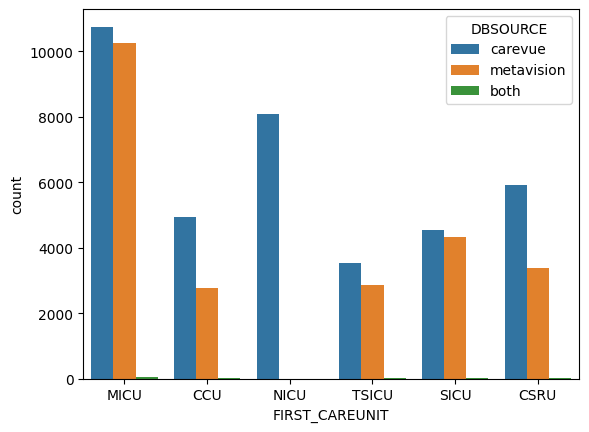

In [16]:
import seaborn as sns
sns.countplot(data=icu, x='FIRST_CAREUNIT', hue='DBSOURCE')


In [19]:
icu = icu[icu['DBSOURCE'] != 'both'].copy()

In [20]:
icu["DBSOURCE"].value_counts(normalize = True)

DBSOURCE
carevue       0.615284
metavision    0.384716
Name: proportion, dtype: float64

REMOVING UNNECESSRaY COLS

In [51]:
cols_to_keep = [
    "SUBJECT_ID", 
    "HADM_ID", 
    "ICUSTAY_ID", 
    "INTIME", 
    "OUTTIME",
    "DBSOURCE",
    "LOS", 
    "FIRST_CAREUNIT"
]
icu_df = icu[cols_to_keep].copy()

In [52]:
icu_df['INTIME'] = pd.to_datetime(icu['INTIME'], errors='coerce')
icu_df['OUTTIME'] = pd.to_datetime(icu['OUTTIME'], errors = 'coerce')

In [58]:
mask = (icu_df['LOS'].isnull())
icu_df[mask]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,DBSOURCE,LOS,FIRST_CAREUNIT
1033,499,138066,265303,2147-01-18 19:11:00,NaT,carevue,NaN,MICU
6451,5216,130232,262702,2114-02-26 05:41:00,NaT,carevue,NaN,NICU
10165,8733,171006,296619,2190-02-03 07:37:00,NaT,carevue,NaN,NICU
10507,6462,168585,270511,2135-04-23 10:06:00,NaT,carevue,NaN,NICU
13080,10168,184129,292281,2111-03-06 20:52:00,NaT,carevue,NaN,MICU
15156,10273,127370,269344,2153-02-16 21:57:00,NaT,carevue,NaN,NICU
17759,14712,188201,259704,2110-01-29 23:41:00,NaT,carevue,NaN,NICU
18442,10128,148324,246075,2117-03-29 18:58:00,NaT,carevue,NaN,CSRU
27840,19967,146232,234207,2168-03-02 23:40:00,NaT,carevue,NaN,NICU
29117,20861,127498,206053,2136-02-20 17:31:00,NaT,carevue,NaN,NICU


In [71]:
icu_df[['SUBJECT_ID']].duplicated().sum()

np.int64(14984)

In [77]:
icu_df['ICUSTAY_ID'].duplicated().sum()


np.int64(0)

In [78]:
icu_df['SUBJECT_ID'].value_counts()

SUBJECT_ID
13033    41
109      38
11861    35
5060     30
19213    25
         ..
16395     1
16396     1
16397     1
16398     1
16387     1
Name: count, Length: 46412, dtype: int64

In [79]:
icu_df.to_csv("cleaned_icustays.csv")